KMeans
K-Means (Unsupervised learning) – used for clustering/segmentation…K is a parameter that tells about the number of clusters….
How it works: For K=2, it randomly puts 2 points in an xy plot….then create cluster by grouping other points that are closest to the points…then select 2 new points in the center of the 2 new clusters……again repeat the same process….

How to select K: Elbow plot technique, like scree plot…..plot scatter(Inertia) on y axis VS K (no of clusters) on x axis.
  
Inertia (Intra cluster distance): Sum of distance of all points in the cluster from the centroid. Need to Minimize

Dunn Index:  min (Inter cluster distance)/ max (Inter cluster distance) | More is better 

Initialization Parameter: Using Kmeans++ gives better performance; instead of randomly picking centroids, it picks one random centroid and then picks others based on certain calculations.

Use cases: Segmentation, Grouping, Recommendation (Music)	

Limitations: 
-	Each data point can only be in 1 cluster so anything that is between cluster overlaps, will not be picked.
-	Categorical variables are not ideally supported, even if you do 1 hot encoding; Categorical variable should not be used for spatial distance based calculation
-	For Categorical, Use KMode clustering technique; not much info available online; uses Hamming distance

In [51]:
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
df=pd.read_excel(r'C:\Users\Manish\Documents\Practice\ml\KMeans\KmeansSampleData.xlsx')
df

,Sales,Employee,Revenue
0,10,2,1000
1,10,3,100
2,100,6,150
3,100,7,500
4,1000,22,2000
5,1000,23,2000
6,10000,44,4000
7,10000,43,4000


In [44]:
mmscaler=preprocessing.MinMaxScaler()

In [45]:
mmscaler.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [46]:
df_transform=mmscaler.transform(df)
df_transform

array([[0.        , 0.        , 0.23076923],
       [0.        , 0.02380952, 0.        ],
       [0.00900901, 0.0952381 , 0.01282051],
       [0.00900901, 0.11904762, 0.1025641 ],
       [0.0990991 , 0.47619048, 0.48717949],
       [0.0990991 , 0.5       , 0.48717949],
       [1.        , 1.        , 1.        ],
       [1.        , 0.97619048, 1.        ]])

In [47]:
objKMeans=KMeans(n_clusters=2, random_state=0)

In [48]:
objKMeans.fit(df_transform)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [49]:
objKMeans.predict(df_transform)

array([0, 0, 0, 0, 0, 0, 1, 1])

Text(0, 0.5, 'Inertia')

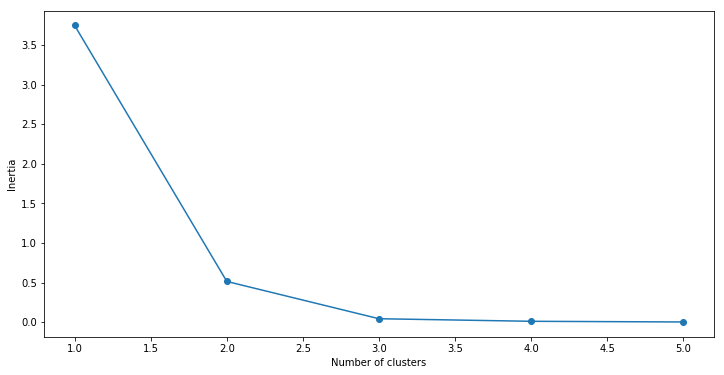

In [54]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,6):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df_transform)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,6), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')